In [1]:
import pandas as pd
import numpy as np
# import pandasql as ps
import matplotlib.pyplot as plt
# Import argsort
from numpy import argsort
from Functions.connection.connection import *
from Functions.AlertP1.data_cleaning import *
from Functions.AlertP1.features import *
from Functions.analysis.step_analysis import *
from Functions.AlertP1.dummy_features import *
from Functions.Models.decision_tree import *
from Functions.Models.evaluation import *



## Connection to databse

In [2]:
alertP1=connection("/Users/MarouanKamoun/Desktop/HGO pbl/credentials.csv")

Tables: [('ConsultaUrgencia_doentespedidosconsultaNeurologia2012',), ('consultaneurologia2012',), ('consultaneurologia201216anon_true',)]
156


## Data cleaning

In [3]:
#changing columns with date to a datetime
date_format_alertP1(alertP1)
#change the blank values in proveniencia and priority to unknown
replace_blank(alertP1)
#create a column with the output of a referral and select the refused and accepted ones
alertP1=result(alertP1)

c:\Users\MarouanKamoun\Desktop\HGO pbl\PBL-HGO\PBL-HGO\Functions\AlertP1\data_cleaning.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP1['PROVENIENCIA'][alertP1['PROVENIENCIA']=='']='unknown'
c:\Users\MarouanKamoun\Desktop\HGO pbl\PBL-HGO\PBL-HGO\Functions\AlertP1\data_cleaning.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP1['CTH_PRIOR'][alertP1['CTH_PRIOR']=='']='unknown'


## Creating new columns for features 

In [4]:
class_area(alertP1)
text_length(alertP1)
referral_steps(alertP1)
speciality(alertP1)
alertP1=unit(alertP1)
alertP1=alertP1.sort_values('DATA_RECEPCAO')
alertP1

c:\Users\MarouanKamoun\Desktop\HGO pbl\PBL-HGO\PBL-HGO\Functions\AlertP1\features.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP1['step'][alertP1['step']>=3]='3+'
c:\Users\MarouanKamoun\Desktop\HGO pbl\PBL-HGO\PBL-HGO\Functions\AlertP1\features.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP1['unit'][alertP1['TIPO_UNID']!='CS/USF']='HOSP'


,ID_DOENTE,PROCESSO,COD_REFERENCIA,COD_PZ,COD_UNID_SAUDE_PROV,UNID_PROV,TIPO_UNID,PROVENIENCIA,COD_CTH_PRIOR,CTH_PRIOR,...,resume saída,mês_saida,ano_saida,Texto,result,area,text_length,step,speciality_type,unit
6944,ZDGGGA,BMJNMVVJ,LOHHHHRS,,0,,OUTRA,unknown,,unknown,...,01/08/2012,8,2012,,1,outside area,0,1,General Neurology,HOSP
3203,CZAEGS,BMNJDBJ,LOHHHOLT,,0,,OUTRA,unknown,,unknown,...,23/01/2012,1,2012,,1,outside area,0,1,Other specialities,HOSP
8620,EZDFGG,BEVIMVIL,LOHHHOQO,,0,,OUTRA,unknown,,unknown,...,04/01/2012,1,2012,,0,outside area,0,1,General Neurology,HOSP
3717,BZGBFZ,VVMBENJE,LOHHHTTH,,0,,OUTRA,unknown,,unknown,...,05/01/2012,1,2012,,0,outside area,0,1,General Neurology,HOSP
9316,ASBZH,BDVCNMLN,LOHHHRVP,,0,,OUTRA,unknown,,unknown,...,05/01/2012,1,2012,,0,outside area,0,1,General Neurology,HOSP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,ECEHHF,VMNMMBEE,LSHVLHRS,,0,,OUTRA,SAM,3,Normal,...,02/03/2018,3,2018,,1,outside area,0,1,General Neurology,HOSP
6398,FFCAE,BIJIILBC,LSHTULLS,,0,,OUTRA,SAM,3,Normal,...,09/03/2018,3,2018,,1,outside area,0,1,General Neurology,HOSP
154,SFFEEE,LLMMCM,LSHSQQPU,,0,,OUTRA,SAM,3,Normal,...,15/06/2018,6,2018,Tonturas. EN normal. TC CE mostrando diversas ...,1,outside area,95,1,Other specialities,HOSP
6664,ZZCDCG,BMJMICVB,LSHTORSQ,,0,,OUTRA,SAM,3,Normal,...,04/05/2018,5,2018,,1,outside area,0,2,General Neurology,HOSP


## structured data with dummies

In [5]:
data=structured_data_dummies(alertP1)
print(data.columns)
data

Index([          'ID_DOENTE',            'PROCESSO',      'COD_REFERENCIA',
                    'COD_PZ', 'COD_UNID_SAUDE_PROV',           'UNID_PROV',
                 'TIPO_UNID',       'COD_CTH_PRIOR',           'CTH_PRIOR',
         'COD_MOTIVO_RECUSA',   'DES_MOTIVO_RECUSA',   'COD_ESPECIALIDADE',
         'DES_ESPECIALIDADE',          'agrupadora',      'OUTRA_ENTIDADE',
             'DATA_RECEPCAO',          'DATA_ENVIO',        'DATA_RETORNO',
                  'NUM_TAXA',              'ESTADO',       'DATA_MARCACAO',
           'DATA_REALIZACAO',         'OBSERVACOES',         'Mês_entrada',
               'Ano_entrada',   'trata data recusa',        'resume saída',
                 'mês_saida',           'ano_saida',               'Texto',
                    'result',         'text_length',        'outside area',
                       'SAM',                 'SON',             'unknown',
        'Other specialities',                     2,                  '3+',
            

,ID_DOENTE,PROCESSO,COD_REFERENCIA,COD_PZ,COD_UNID_SAUDE_PROV,UNID_PROV,TIPO_UNID,COD_CTH_PRIOR,CTH_PRIOR,COD_MOTIVO_RECUSA,...,outside area,SAM,SON,unknown,Other specialities,2,3+,HOSP,UCSP,USF
6944,ZDGGGA,BMJNMVVJ,LOHHHHRS,,0,,OUTRA,,unknown,0,...,1,0,0,1,0,0,0,1,0,0
3203,CZAEGS,BMNJDBJ,LOHHHOLT,,0,,OUTRA,,unknown,0,...,1,0,0,1,1,0,0,1,0,0
8620,EZDFGG,BEVIMVIL,LOHHHOQO,,0,,OUTRA,,unknown,1,...,1,0,0,1,0,0,0,1,0,0
3717,BZGBFZ,VVMBENJE,LOHHHTTH,,0,,OUTRA,,unknown,7,...,1,0,0,1,0,0,0,1,0,0
9316,ASBZH,BDVCNMLN,LOHHHRVP,,0,,OUTRA,,unknown,1,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,ECEHHF,VMNMMBEE,LSHVLHRS,,0,,OUTRA,3,Normal,0,...,1,1,0,0,0,0,0,1,0,0
6398,FFCAE,BIJIILBC,LSHTULLS,,0,,OUTRA,3,Normal,0,...,1,1,0,0,0,0,0,1,0,0
154,SFFEEE,LLMMCM,LSHSQQPU,,0,,OUTRA,3,Normal,0,...,1,1,0,0,1,0,0,1,0,0
6664,ZZCDCG,BMJMICVB,LSHTORSQ,,0,,OUTRA,3,Normal,0,...,1,1,0,0,0,1,0,1,0,0


##  Decision Tree classification model for whole dataset

Accuracy of the train set: 0.7717028937191626
Recall of the train set: 0.6610610669950446
Precision of the train set: 0.7586641509597263
Accuracy: 0.5845333333333333
Recall: 0.5414033363340743
Precision: 0.7424295395869192


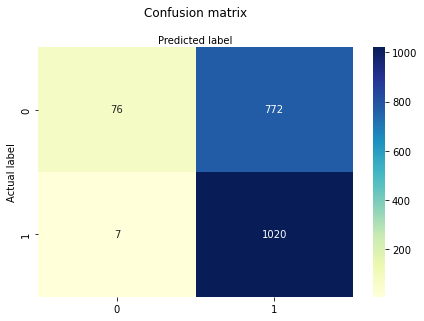

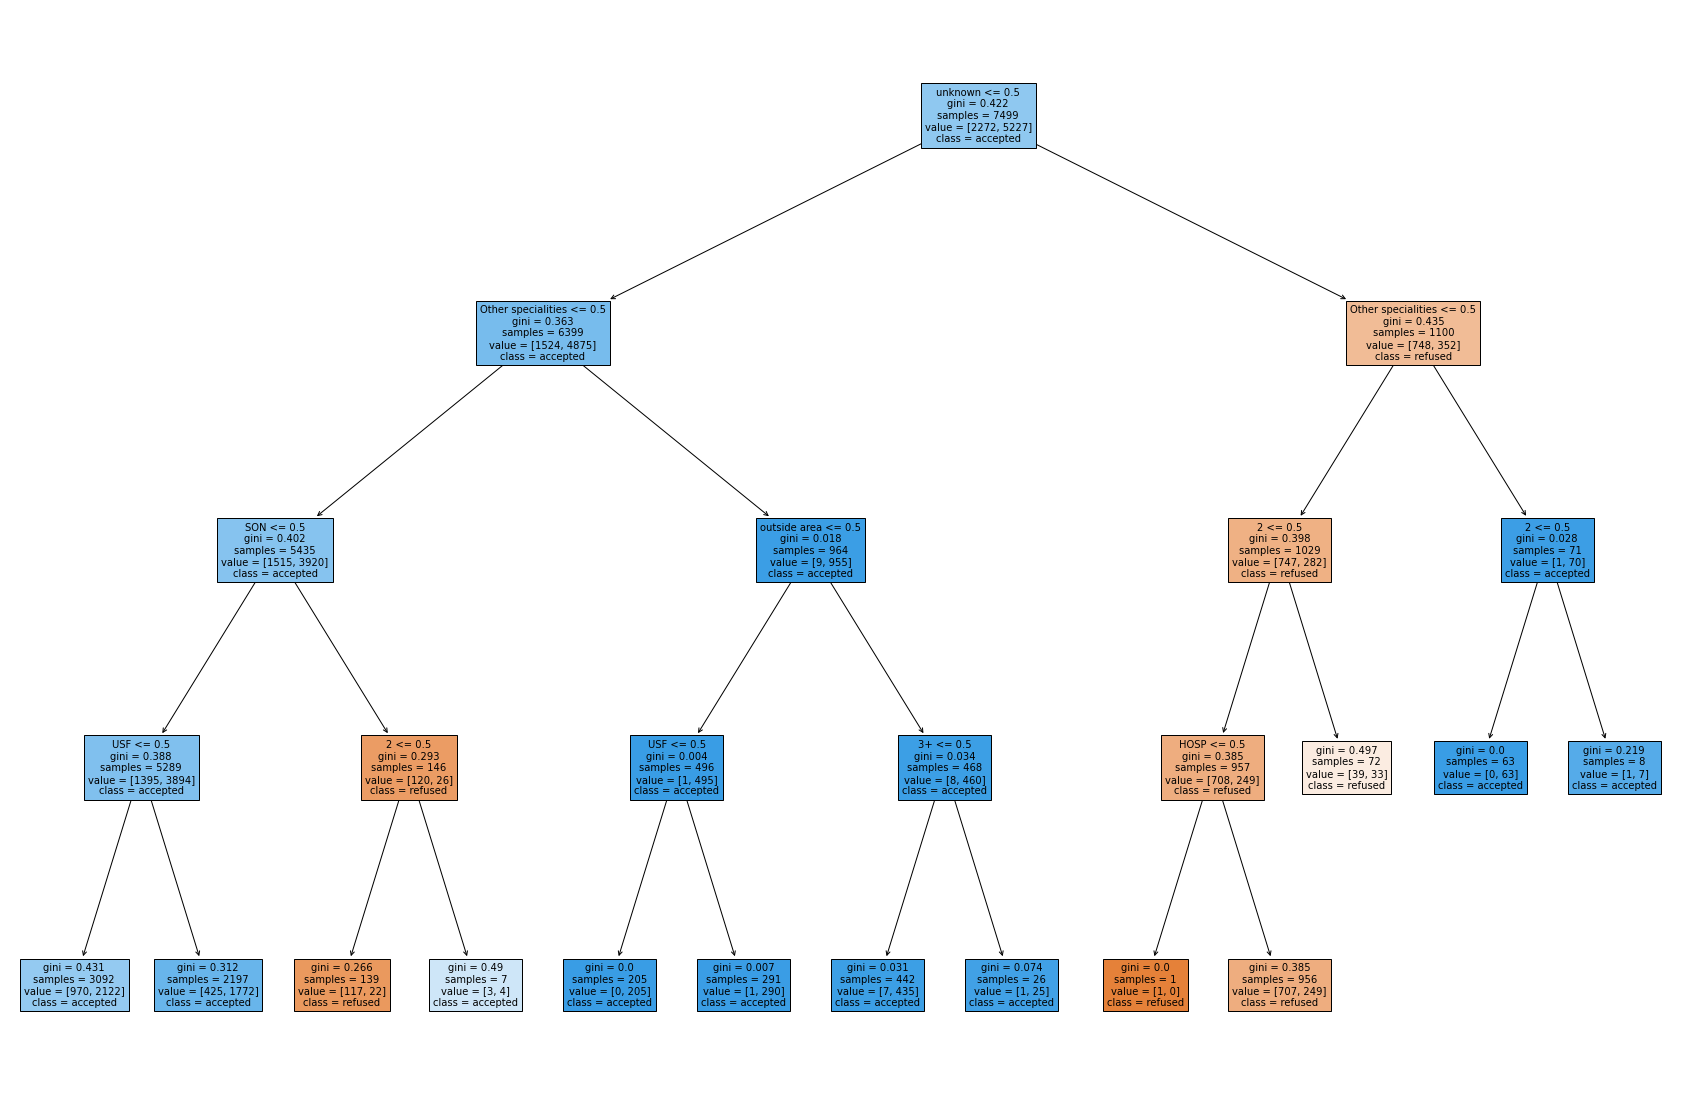

              precision    recall  f1-score   support

    accepted       0.92      0.09      0.16       848
     refused       0.57      0.99      0.72      1027

    accuracy                           0.58      1875
   macro avg       0.74      0.54      0.44      1875
weighted avg       0.73      0.58      0.47      1875



In [6]:
# Decision Tree classification model for whole dataset

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report

#split dataset in features and target variable
eliminate_cols=['ID_DOENTE','PROCESSO','COD_REFERENCIA','result','COD_PZ','COD_UNID_SAUDE_PROV','UNID_PROV','TIPO_UNID','COD_CTH_PRIOR','CTH_PRIOR','COD_MOTIVO_RECUSA','DES_MOTIVO_RECUSA','COD_ESPECIALIDADE','DES_ESPECIALIDADE','agrupadora','OUTRA_ENTIDADE','DATA_RECEPCAO','DATA_ENVIO','DATA_RETORNO','NUM_TAXA','ESTADO','DATA_MARCACAO','DATA_REALIZACAO','OBSERVACOES','Mês_entrada','Ano_entrada','trata data recusa','resume saída','mês_saida','ano_saida','Texto', 'text_length']
X = data.drop(eliminate_cols,axis=1)# Features
y = data.result # Target variable
features = list(X.columns)
# feature_cols = ['text_length','outside area','SAM','SON','unknown','Other specialities']
# X = data[feature_cols] # Features
# y = data.result # Target variable

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=False)

# Train a decision tree classifier
clf = DecisionTreeClassifier(max_depth=4, random_state = 42)
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the train set
accuracy = accuracy_score(y_train, clf.predict(X_train))
print("Accuracy of the train set:", accuracy)

# Evaluate the recall of the train set
recall = recall_score(y_train,clf.predict(X_train), average='macro')
print("Recall of the train set:", recall)
# Evaluate the precision of the train set
precision = precision_score(y_train, clf.predict(X_train), average='macro')
print("Precision of the train set:", precision)


# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate the recall of the model
recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)

# Evaluate the precision of the model
precision = precision_score(y_test, y_pred, average='macro')
print("Precision:", precision)

# Calculate the confusion matrix of the model
cm = confusion_matrix(y_test, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Visualize the decision tree
plt.figure(figsize=(30, 20))
plot_tree(clf, feature_names= features, class_names=['refused', 'accepted'], filled=True)
plt.show()

# Print the evaluation matrix
target_names = ['accepted', 'refused']
print(classification_report(y_test, y_pred, target_names=target_names))

## Decision Tree classification model for text rows

Accuracy of the train set: 0.8034188034188035
Recall of the train set: 0.6579557713052858
Precision of the train set: 0.8528738402217134
Accuracy: 0.5372670807453416
Recall: 0.5033333333333333
Precision: 0.7679127725856698


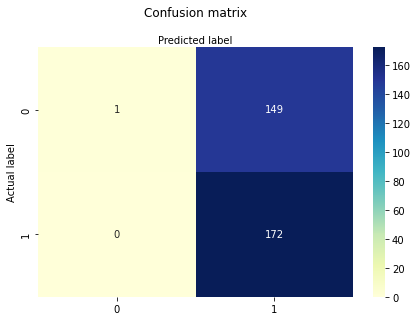

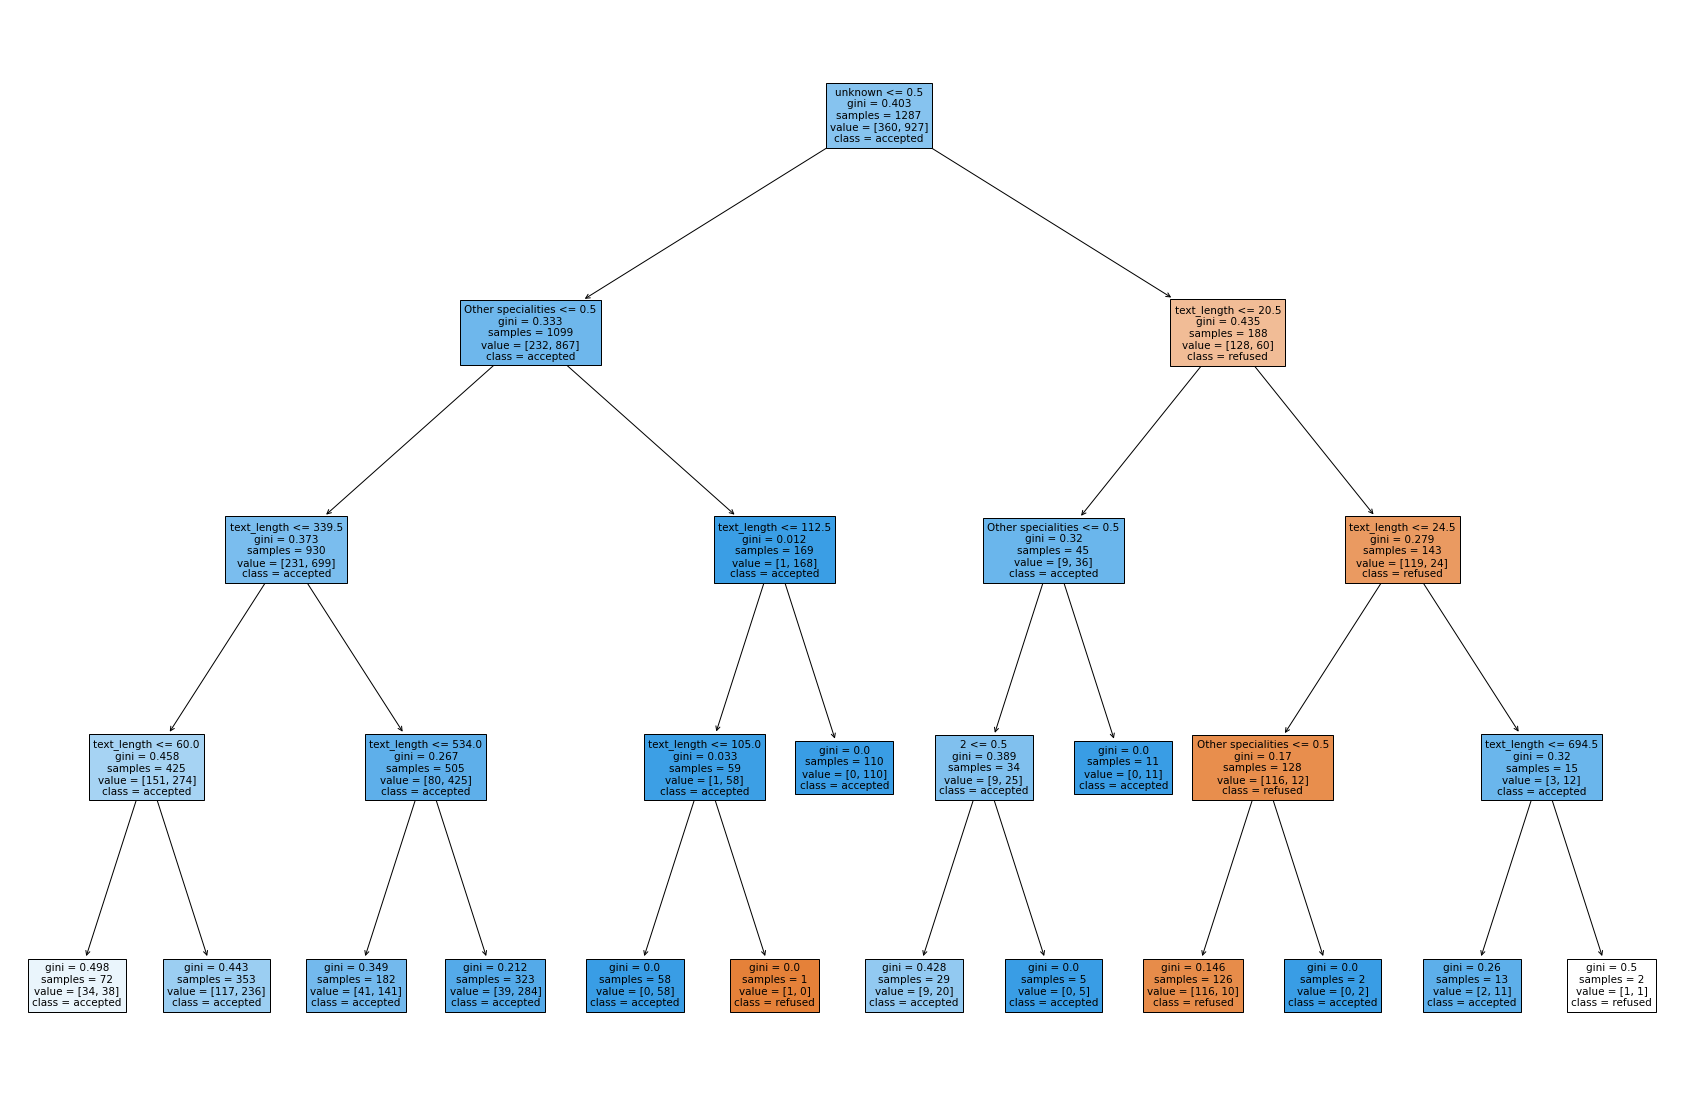

              precision    recall  f1-score   support

    accepted       1.00      0.01      0.01       150
     refused       0.54      1.00      0.70       172

    accuracy                           0.54       322
   macro avg       0.77      0.50      0.36       322
weighted avg       0.75      0.54      0.38       322



In [7]:
# Decision Tree classification model for text rows
data_no_text=data[data['text_length']>0]
#split dataset in features and target variable
eliminate_cols=['ID_DOENTE','PROCESSO','COD_REFERENCIA','result','COD_PZ','COD_UNID_SAUDE_PROV','UNID_PROV','TIPO_UNID','COD_CTH_PRIOR','CTH_PRIOR','COD_MOTIVO_RECUSA','DES_MOTIVO_RECUSA','COD_ESPECIALIDADE','DES_ESPECIALIDADE','agrupadora','OUTRA_ENTIDADE','DATA_RECEPCAO','DATA_ENVIO','DATA_RETORNO','NUM_TAXA','ESTADO','DATA_MARCACAO','DATA_REALIZACAO','OBSERVACOES','Mês_entrada','Ano_entrada','trata data recusa','resume saída','mês_saida','ano_saida','Texto']
X = data_no_text.drop(eliminate_cols,axis=1)# Features
y = data_no_text.result # Target variable
features = list(X.columns)
# feature_cols = ['text_length','outside area','SAM','SON','unknown','Other specialities']
# X = data_no_text[feature_cols] # Features
# y = data_no_text.result # Target variable

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=False)

# Train a decision tree classifier
clf = DecisionTreeClassifier(max_depth=4, random_state = 42)
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the train set
accuracy = accuracy_score(y_train, clf.predict(X_train))
print("Accuracy of the train set:", accuracy)

# Evaluate the recall of the train set
recall = recall_score(y_train,clf.predict(X_train), average='macro')
print("Recall of the train set:", recall)
# Evaluate the precision of the train set
precision = precision_score(y_train, clf.predict(X_train), average='macro')
print("Precision of the train set:", precision)


# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate the recall of the model
recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)

# Evaluate the precision of the model
precision = precision_score(y_test, y_pred, average='macro')
print("Precision:", precision)

# Calculate the confusion matrix of the model
cm = confusion_matrix(y_test, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Visualize the decision tree
plt.figure(figsize=(30, 20))
plot_tree(clf, feature_names= features, class_names=['refused', 'accepted'], filled=True)
plt.show()

# Print the evaluation matrix
target_names = ['accepted', 'refused']
print(classification_report(y_test, y_pred, target_names=target_names))

## Decision Tree without low p-value

Accuracy of the train set: 0.8034188034188035
Recall of the train set: 0.6579557713052858
Precision of the train set: 0.8528738402217134
Accuracy: 0.5372670807453416
Recall: 0.5033333333333333
Precision: 0.7679127725856698


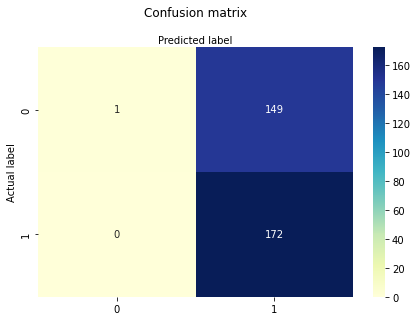

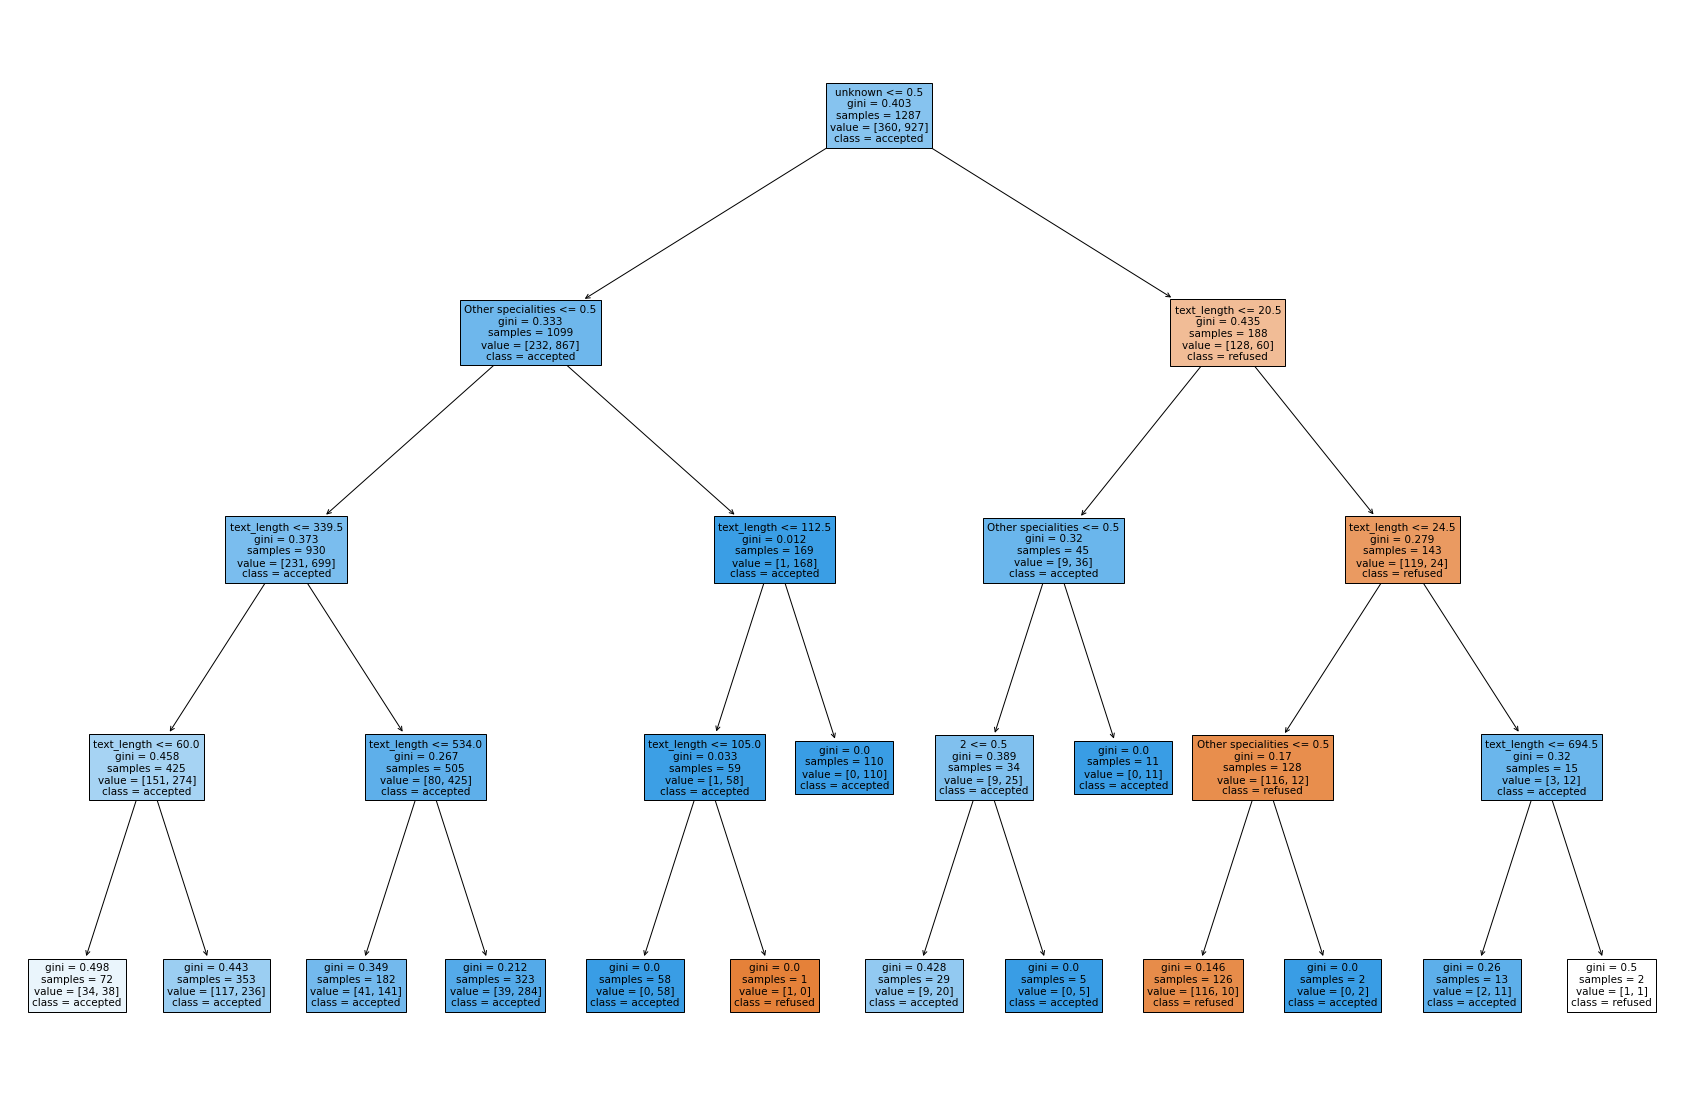

              precision    recall  f1-score   support

    accepted       1.00      0.01      0.01       150
     refused       0.54      1.00      0.70       172

    accuracy                           0.54       322
   macro avg       0.77      0.50      0.36       322
weighted avg       0.75      0.54      0.38       322



In [9]:
# Decision Tree classification model for text rows
data_no_text=data[data['text_length']>0]
#split dataset in features and target variable
eliminate_cols=['ID_DOENTE','PROCESSO','COD_REFERENCIA','result','COD_PZ','COD_UNID_SAUDE_PROV','UNID_PROV','TIPO_UNID','COD_CTH_PRIOR','CTH_PRIOR','COD_MOTIVO_RECUSA','DES_MOTIVO_RECUSA','COD_ESPECIALIDADE','DES_ESPECIALIDADE','agrupadora','OUTRA_ENTIDADE','DATA_RECEPCAO','DATA_ENVIO','DATA_RETORNO','NUM_TAXA','ESTADO','DATA_MARCACAO','DATA_REALIZACAO','OBSERVACOES','Mês_entrada','Ano_entrada','trata data recusa','resume saída','mês_saida','ano_saida','Texto','UCSP','3+']
X = data_no_text.drop(eliminate_cols,axis=1)# Features
y = data_no_text.result # Target variable
features = list(X.columns)
# feature_cols = ['text_length','outside area','SAM','SON','unknown','Other specialities']
# X = data_no_text[feature_cols] # Features
# y = data_no_text.result # Target variable

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=False)

# Train a decision tree classifier
clf = DecisionTreeClassifier(max_depth=4, random_state = 42)
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the train set
accuracy = accuracy_score(y_train, clf.predict(X_train))
print("Accuracy of the train set:", accuracy)

# Evaluate the recall of the train set
recall = recall_score(y_train,clf.predict(X_train), average='macro')
print("Recall of the train set:", recall)
# Evaluate the precision of the train set
precision = precision_score(y_train, clf.predict(X_train), average='macro')
print("Precision of the train set:", precision)


# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate the recall of the model
recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)

# Evaluate the precision of the model
precision = precision_score(y_test, y_pred, average='macro')
print("Precision:", precision)

# Calculate the confusion matrix of the model
cm = confusion_matrix(y_test, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Visualize the decision tree
plt.figure(figsize=(30, 20))
plot_tree(clf, feature_names= features, class_names=['refused', 'accepted'], filled=True)
plt.show()

# Print the evaluation matrix
target_names = ['accepted', 'refused']
print(classification_report(y_test, y_pred, target_names=target_names))